# Classification algorithm with pytorch

Here I will implement a classification algorithm using Pytorch, a linear layer and a softmax activation function.

The steps I will follow are:

- Import the Iris Dataset dataset from scikit learn
- Divide the dataset into test and training set
- Plot the data, for the lector to have an idea of the classification
- Create the neural network 
- Compute the percentaje of sucsses of the trained model


## Import the Iris dataset and splitting the data

The command datasets.load_iris() will load a dictionary with two keys: "data" and "target". These keys have the data organized in numpy arrays.

The features matrix have a dimension $150\times 4$, which means 4 features and 150 measures of those features.


On the other hand, the labels have a dimension $150\times 1$. Note that for each measurement there is a label, i.e, a classification. This classification is 1,2,3 that stands for iris, setosa and versicolor.



In [4]:
from sklearn import datasets # Import the library with the datasets
from sklearn.model_selection import train_test_split # To split the dataset


iris_dataset = datasets.load_iris() # Load the dataset dictionary
features = iris_dataset["data"] # This is a numpy array 150x4
labels = iris_dataset["target"] # This is a numpy array 150


####### Splitting train and tets set ##########

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)



## Plotting the data


The amount of features is 4, however, to give us an idea we will plot the two first columns.



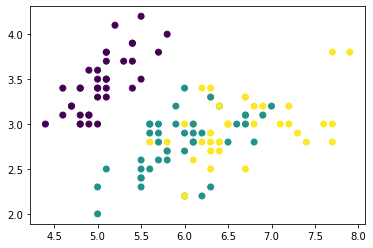

In [9]:
import matplotlib.pyplot as plt
two_columns = x_train[:,:2]
plt.scatter(two_columns[:,0], two_columns[:,1], c = y_train)

We can do the same for the next two columns

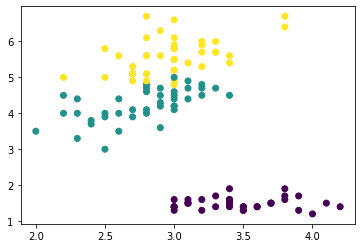

In [10]:
import matplotlib.pyplot as plt
two_columns = x_train[:,1:3]
plt.scatter(two_columns[:,0], two_columns[:,1], c = y_train)

## Create the model with Pytorch

In [37]:
import torch
import numpy as np
# Create the tensors for the model
# Create the tensor x
X_train = torch.tensor(x_train, dtype = float)


# Create the tensor for y
# To apply the sofmax we need 3 neurons at the end
# We will reshape the labels as follows:
# [1,0,0] if 0
# [0,1,0] if 1
# [0,0,1] if 2
y_temp = []
for i in range(len(y_train)):
  if round(y_train[i]) == 0:
    y_temp.append([1,0,0])
  elif round(y_train[i]) == 1:
    y_temp.append([0,1,0])
  elif round(y_train[i]) == 2:
    y_temp.append([0,0,1])
y_temp = np.array(y_temp)
#print(y_temp)
Y_train = torch.tensor(y_temp, dtype=float)

# Note that now our data is X_train (120x4), Y_train (120,3). In the case of Y, each columns in a class
n_data, n_features = X_train.shape
n_data, n_classes = Y_train.shape
print(n_features, n_classes)


model = torch.nn.Linear(n_features, n_classes,dtype = float)

criterion = torch.nn.CrossEntropyLoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

n_epochs = 100000

for epoch in range(n_epochs):
  y_predicted = torch.softmax(model(X_train), dim=1)
  loss = criterion(y_predicted,Y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
w,b = model.parameters()

print(w,b)



4 3
Parameter containing:
tensor([[ 1.3971,  3.3373, -4.3120, -2.2558],
        [ 1.4840, -0.3215, -0.8259, -1.7087],
        [-2.8820, -4.0970,  5.8723,  4.2569]], dtype=torch.float64,
       requires_grad=True) Parameter containing:
tensor([ 0.7780,  1.6178, -2.6882], dtype=torch.float64, requires_grad=True)


### Testing the model



In [40]:
# Convert the test set into tensor
X_test = torch.tensor(x_test, dtype = float)

# Predict with our trained model
Y_predictions = torch.softmax(model(X_test), dim=1)


# Counting the percentaje of correct predictions
positives = 0
for i in range(len(Y_predictions_arr)):
  arr = Y_predictions_arr[i,:]
  value = np.where(arr == max(arr))
  value = int(value[0])
  if value == y_test[i]:
    positives += 1
print(100*positives/len(Y_predictions_arr))

96.66666666666667
